# CSE 252B: Computer Vision II, Winter 2018 – Assignment 1
### Instructor: Ben Ochoa
### Due: Wednesday, January 17, 2018, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Line-plane intersection (5 points)
  The line in 3D defined by the join of the points $\boldsymbol{X}_1 = (X_1,
  Y_1, Z_1, T_1)^\top$ and $\boldsymbol{X}_2 = (X_2, Y_2, Z_2, T_2)^\top$
  can be represented as a Plucker matrix $\boldsymbol{L} = \boldsymbol{X}_1
  \boldsymbol{X}_2^\top - \boldsymbol{X}_2 \boldsymbol{X}_1^\top$ or pencil of points
  $\boldsymbol{X}(\lambda) = \lambda \boldsymbol{X}_1 + (1 - \lambda) \boldsymbol{X}_2$
  (i.e., $\boldsymbol{X}$ is a function of $\lambda$).  The line intersects
  the plane $\boldsymbol{\pi} = (a, b, c, d)^\top$ at the point
  $\boldsymbol{X}_{\boldsymbol{L}} = \boldsymbol{L} \boldsymbol{\pi}$ or
  $\boldsymbol{X}(\lambda_{\boldsymbol{\pi}})$, where $\lambda_{\boldsymbol{\pi}}$ is
  determined such that $\boldsymbol{X}(\lambda_{\boldsymbol{\pi}})^\top \boldsymbol{\pi} =
  0$ (i.e., $\boldsymbol{X}(\lambda_{\boldsymbol{\pi}})$ is the point on
  $\boldsymbol{\pi}$).  Show that $\boldsymbol{X}_{\boldsymbol{L}}$ is equal to
  $\boldsymbol{X}(\lambda_{\boldsymbol{\pi}})$ up to scale.

Your solution here

## Problem 2 (Math): Line-quadric intersection (5 points)
  In general, a line in 3D intersects a quadric $\boldsymbol{Q}$ at zero, one
  (if the line is tangent to the quadric), or two points.  If the
  pencil of points $\boldsymbol{X}(\lambda) = \lambda \boldsymbol{X}_1 + (1 -
  \lambda) \boldsymbol{X}_2$ represents a line in 3D, the (up to two) real
  roots of the quadratic polynomial $c_2 \lambda_{\boldsymbol{Q}}^2 + c_1
  \lambda_{\boldsymbol{Q}} + c_0 = 0$ are used to solve for the intersection
  point(s) $\boldsymbol{X}(\lambda_{\boldsymbol{Q}})$.  Show that $c_2 =
  \boldsymbol{X}_1^\top \boldsymbol{Q} \boldsymbol{X}_1 - 2 \boldsymbol{X}_1^\top \boldsymbol{Q}
  \boldsymbol{X}_2 + \boldsymbol{X}_2^\top \boldsymbol{Q} \boldsymbol{X}_2$, $c_1 = 2 (
  \boldsymbol{X}_1^\top \boldsymbol{Q} \boldsymbol{X}_2 - \boldsymbol{X}_2^\top \boldsymbol{Q}
  \boldsymbol{X}_2 )$, and $c_0 = \boldsymbol{X}_2^\top \boldsymbol{Q} \boldsymbol{X}_2$.


Your solution here

## Problem 3 (Programing): Feature detection (20 points)
Download input data from the course website. The file price_center20.JPG
contains image 1 and the file price_center21.JPG contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
around 600–650 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

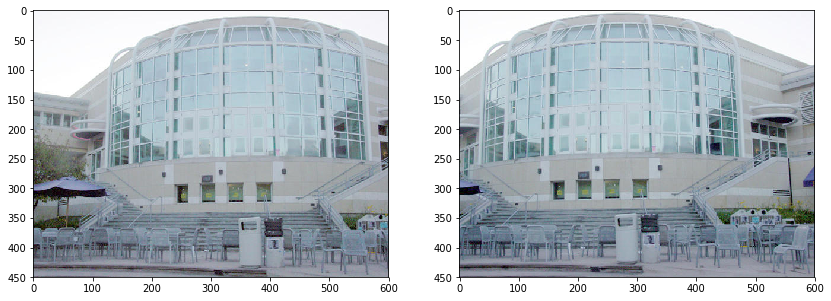

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# open the input images
I1 = np.array(Image.open('price_center20.JPG'), dtype='float')/255.
I2 = np.array(Image.open('price_center21.JPG'), dtype='float')/255.

# Display the input images
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(I1)
plt.subplot(1,2,2)
plt.imshow(I2)
plt.show()

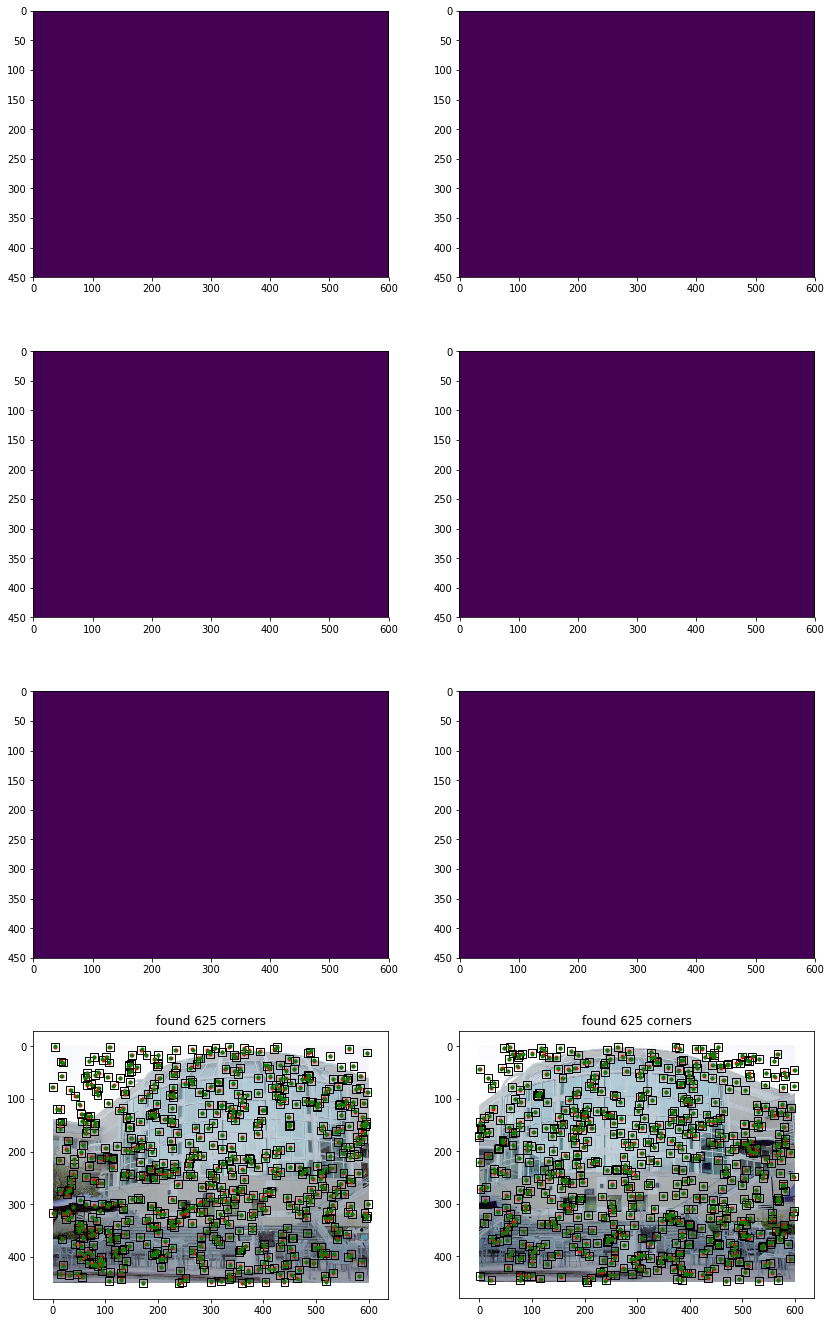

In [2]:
def corner(I, w, t, w_nms):
    # inputs: 
    # I is the input image (may be mxn for BW or mxnx3 for RGB)
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the window used for nonmaximal supression
    # outputs:
    # J0 is the mxn image of minor eigenvalues of N before thresholding
    # J1 is the mxn image of minor eigenvalues of N after thresholding
    # J2 is the mxn image of minor eigenvalues of N after nonmaximal supression
    # pts0 is the 2xk list of coordinates of (pixel accurate) corners
    #     (ie. coordinates of nonzero values of J2)
    # pts1 is the 2xk list of coordinates of subpixel accurate corners
    #     found using the Forstner detector
    
    """your code here"""
    m,n = I.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))
    J2 = np.zeros((m,n))
    pts0 = np.vstack((np.random.randint(0,n,(1,625)),
                      np.random.randint(0,m,(1,625)) ))
    pts1 = pts0 + np.random.randn(2,625)
    
    return J0, J1, J2, pts0, pts1


# parameters to tune
w=15
t=.6
w_nms=7

# extract corners
J1_0, J1_1, J1_2, pts1_0, pts1_1 = corner(I1, w, t, w_nms)
J2_0, J2_1, J2_2, pts2_0, pts2_1 = corner(I2, w, t, w_nms)

# Display results
plt.figure(figsize=(14,24))

# show pre-thresholded corner heat map
plt.subplot(4,2,1)
plt.imshow(J1_0)
plt.subplot(4,2,2)
plt.imshow(J2_0)

# show thresholded corner heat map
plt.subplot(4,2,3)
plt.imshow(J1_1)
plt.subplot(4,2,4)
plt.imshow(J2_1)

# show corner heat map after nonmaximal supression
plt.subplot(4,2,5)
plt.imshow(J1_2)
plt.subplot(4,2,6)
plt.imshow(J2_2)

# show corners on origional images
ax = plt.subplot(4,2,7)
plt.imshow(I1)
# draw rectangles of size w around corners
for i in range(pts1_0.shape[1]):
    x,y = pts1_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts1_0[0,:], pts1_0[1,:], '.r') # display pixel accurate corners
plt.plot(pts1_1[0,:], pts1_1[1,:], '.g') # display subpixel corners
plt.title('found %d corners'%pts1_0.shape[1])
ax = plt.subplot(4,2,8)
plt.imshow(I2)
for i in range(pts2_0.shape[1]):
    x,y = pts2_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts2_0[0,:], pts2_0[1,:], '.r')
plt.plot(pts2_1[0,:], pts2_1[1,:], '.g')
plt.title('found %d corners'%pts2_0.shape[1])

plt.show()

## Problem 4 (Programing): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that around 200 putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

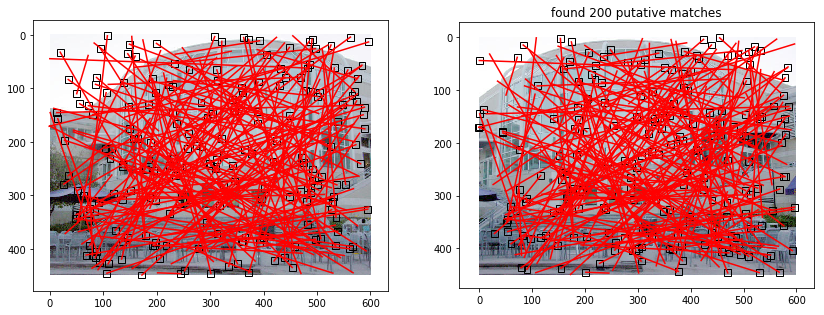

In [13]:
def match(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the proximity threshold
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    # scores is a vector of length k that contains the correlation
    #     coefficients of the matches
    
    """your code here"""
    inds = np.vstack((np.random.choice(pts1.shape[1],200,replace=False), 
                      np.random.choice(pts1.shape[1],200,replace=False)))
    scores = np.random.rand(200)
    
    return inds, scores

# parameters to tune
w1 = 13
t1 = 0
d1 = 12
p1 = np.inf

# do the matching
inds, scores = match(I1, I2, pts1_1, pts2_1, w1, t1, d1, p1)

# display the results
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
plt.title('found %d putative matches'%inds.shape[1])
ax2.imshow(I2)
for i in range(inds.shape[1]):
    ii = inds[0,i]
    jj = inds[1,i]
    x1 = pts1_1[0,ii]
    x2 = pts2_1[0,jj]
    y1 = pts1_1[1,ii]
    y2 = pts2_1[1,jj]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w1/2,y1-w1/2),w1,w1, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w1/2,y2-w1/2),w1,w1, fill=False))
plt.show()